In [51]:
## Importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Overview of the Data Set

##### The Business Dynamics Statistics (BDS) includes measures of establishment openings and closings, firm startups, job creation and 
##### destruction by firm size, age, and industrial sector, and several other statistics on business dynamics. The U.S. economy is comprised of over 6 
##### million establishments with paid employees. The population of these businesses is constantly churning -- some businesses grow, others decline and 
##### yet others close. New businesses are constantly replenishing this pool. The BDS series provide annual statistics on gross job gains and losses for 
##### the entire economy and by industrial sector, state, and MSA. These data track changes in employment at the establishment level, and thus provide a 
##### picture of the dynamics underlying aggregate net employment growth.


##### There is a longstanding interest in the contribution of small businesses to job and productivity growth in the U.S. Some recent research suggests that 
##### it is business age rather than size that is the critical factor. The BDS permits exploring the respective contributions of both firm age and size.

##### BDS is based on data going back through 1976. This allows business dynamics to be tracked, measured and analyzed for young firms in their first 
##### critical years as well as for more mature firms including those that are in the process of reinventing themselves in an ever changing economic 
##### environment.

In [41]:
df = pd.read_csv('business_dynamics.csv')

C:\Users\ysagp\AppData\Local\Temp\ipykernel_16804\986310505.py:1: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



In [42]:
df.head()

,State,Year,DHS_Denominator,Number_of_Firms_CurrentYear,Calculated.Net_Job_Creation,Calculated.Net_Job_Creation_Rate,Calculated.Reallocation_Rate,Establishments.Entered,Establishments.Entered_Rate,Establishments.Exited,Establishments.Exited_Rate,Establishments.Physical_Locations,Firm_Exits.Count,Firm_Exits.Establishment_Exit,Firm_Exits.Employments,Job_Creation.Births,Job_Creation.Continuers,Job_Creation.Count,Job_Creation.Rate,Job_Creation.Rate/Births,Job_Destruction.Continuers,Job_Destruction.Count,Job_Destruction.Deaths,Job_Destruction.Rate,Job_Destruction.Rate/Deaths,Firm_Age
0,Alabama,1978.0,972627.0,54597.0,74178.0,8.0,29.0,10457.0,16.0,7749.0,12.0,65213.0,5248.0,5329.0,28257.0,76167.0,139930.0,216097.0,22.0,8.0,81829.0,141919.0,60090.0,15.0,6.0,40.0
1,Alabama,1979.0,1037995.0,55893.0,58099.0,6.0,31.0,9668.0,15.0,7604.0,12.0,66797.0,5234.0,5294.0,29467.0,76618.0,143675.0,220293.0,21.0,7.0,101842.0,162194.0,60352.0,16.0,6.0,39.0
2,Alabama,1980.0,1064141.0,54838.0,7253.0,1.0,32.0,8714.0,13.0,8871.0,13.0,66095.0,6058.0,6128.0,32427.0,65734.0,106998.0,172732.0,16.0,6.0,120563.0,179985.0,59422.0,17.0,6.0,38.0
3,Alabama,1981.0,1051448.0,54791.0,9132.0,1.0,31.0,8371.0,13.0,7516.0,11.0,66410.0,5176.0,5269.0,27038.0,70115.0,93941.0,164056.0,16.0,7.0,121251.0,173188.0,51937.0,16.0,5.0,37.0
4,Alabama,1982.0,1037728.0,53219.0,9658.0,1.0,33.0,8185.0,12.0,8621.0,13.0,65276.0,6077.0,6147.0,34073.0,73083.0,98887.0,171970.0,17.0,7.0,119658.0,181628.0,61970.0,18.0,6.0,36.0


In [5]:
pd.set_option('display.max_columns', None)

In [39]:
df.describe()

,Year,DHS_Denominator,Number_of_Firms_CurrentYear,Calculated.Net_Job_Creation,Calculated.Net_Job_Creation_Rate,Calculated.Reallocation_Rate,Establishments.Entered,Establishments.Entered_Rate,Establishments.Exited,Establishments.Exited_Rate,Establishments.Physical_Locations,Firm_Exits.Count,Firm_Exits.Establishment_Exit,Firm_Exits.Employments,Job_Creation.Births,Job_Creation.Continuers,Job_Creation.Count,Job_Creation.Rate,Job_Creation.Rate/Births,Job_Destruction.Continuers,Job_Destruction.Count,Job_Destruction.Deaths,Job_Destruction.Rate,Job_Destruction.Rate/Deaths
count,1927.000000,1.927000e+03,1927.000000,1927.000000,1927.000000,1927.000000,1927.000000,1927.000000,1927.000000,1927.000000,1927.000000,1927.000000,1927.000000,1927.000000,1927.000000,1.927000e+03,1.927000e+03,1927.000000,1927.000000,1.927000e+03,1.927000e+03,1927.000000,1927.000000,1927.000000
mean,1998.000000,2.044107e+06,96965.200311,53118.409964,2.768033,27.040996,13964.607161,11.718215,11899.171251,9.811624,120550.255319,7925.428127,8108.881162,48910.595226,114440.008303,2.072299e+05,3.216699e+05,15.870265,5.719253,1.913492e+05,2.872205e+05,95852.813181,13.944992,4.628957
std,11.835231,2.267467e+06,105833.320289,77720.038726,2.242712,4.582562,16267.576257,2.536953,13930.422531,1.515345,131801.314781,9329.015762,9553.559737,60360.383256,135035.196137,2.408681e+05,3.742317e+05,3.268177,1.679872,2.231656e+05,3.379401e+05,116230.904202,2.610802,1.176903
min,1978.000000,1.053610e+05,7107.000000,6.000000,0.000000,17.000000,1273.000000,7.000000,975.000000,6.000000,8396.000000,635.000000,642.000000,2990.000000,6824.000000,1.393300e+04,2.307900e+04,10.000000,3.000000,1.044500e+04,1.863400e+04,5267.000000,8.000000,2.000000
25%,1988.000000,4.933850e+05,27742.000000,9649.500000,1.000000,24.000000,3929.000000,10.000000,3287.000000,9.000000,33588.500000,2193.500000,2235.000000,11937.500000,28058.500000,4.804200e+04,7.657500e+04,14.000000,5.000000,4.494250e+04,6.764600e+04,22329.500000,12.000000,4.000000
50%,1998.000000,1.290824e+06,64311.000000,26654.000000,2.000000,27.000000,9036.000000,11.000000,7595.000000,10.000000,80533.000000,5137.000000,5222.000000,30099.000000,71628.000000,1.307720e+05,2.020370e+05,15.000000,6.000000,1.182680e+05,1.787670e+05,58367.000000,14.000000,5.000000
75%,2008.000000,2.599074e+06,115323.000000,63994.000000,4.000000,30.000000,16476.000000,13.000000,13863.500000,11.000000,143603.500000,9062.500000,9252.000000,56043.500000,136589.000000,2.540895e+05,3.887100e+05,18.000000,7.000000,2.383935e+05,3.562210e+05,114235.000000,15.000000,5.000000
max,2018.000000,1.485803e+07,664454.000000,864280.000000,17.000000,65.000000,111144.000000,25.000000,96943.000000,19.000000,836870.000000,63112.000000,64550.000000,483486.000000,922727.000000,1.572805e+06,2.376656e+06,33.000000,14.000000,1.786485e+06,2.710267e+06,923782.000000,34.000000,17.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1927 entries, 0 to 1926
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   State                              1927 non-null   object
 1   Year                               1927 non-null   int64 
 2   DHS_Denominator                    1927 non-null   int64 
 3   Number_of_Firms_CurrentYear        1927 non-null   int64 
 4   Calculated.Net_Job_Creation        1927 non-null   int64 
 5   Calculated.Net_Job_Creation_Rate   1927 non-null   int64 
 6   Calculated.Reallocation_Rate       1927 non-null   int64 
 7   Establishments.Entered             1927 non-null   int64 
 8   Establishments.Entered_Rate        1927 non-null   int64 
 9   Establishments.Exited              1927 non-null   int64 
 10  Establishments.Exited_Rate         1927 non-null   int64 
 11  Establishments.Physical_Locations  1927 non-null   int64 
 12  Firm_E

##### Trend Analysis of Net Job Creation Rate:
##### This question aims to visualize how the net job creation rate has changed over time, providing insights into overall job growth or decline.

C:\Users\ysagp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\ysagp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



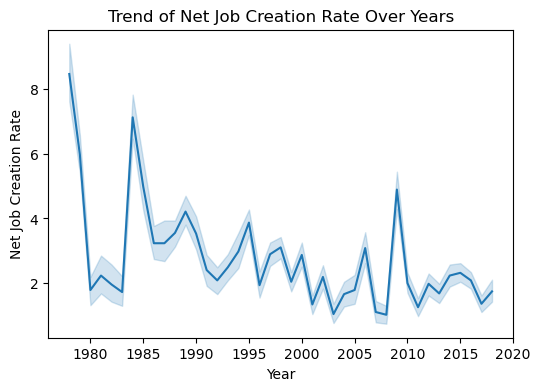

In [40]:
# Line plot for net job creation rate over years
plt.figure(figsize=(6, 4))
sns.lineplot(data=df, x='Year', y='Calculated.Net_Job_Creation_Rate')
plt.title('Trend of Net Job Creation Rate Over Years')
plt.xlabel('Year')
plt.ylabel('Net Job Creation Rate')
plt.show()

##### Correlation between Job Creation and Job Destruction:
##### It seeks to explore whether there is a relationship between job creation and job destruction, which can indicate the overall health of job dynamics.

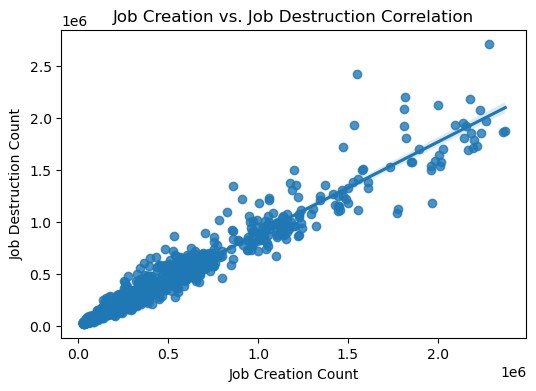

In [24]:
# Scatter plot with regression line for job creation vs. job destruction
plt.figure(figsize=(6, 4))
sns.regplot(data=df, x='Job_Creation.Count', y='Job_Destruction.Count')
plt.title('Job Creation vs. Job Destruction Correlation')
plt.xlabel('Job Creation Count')
plt.ylabel('Job Destruction Count')
plt.show()

##### State-wise Job Creation Rate Comparison:
##### This question compares job creation rates across different states, helping to identify which states are performing better in terms of job creation.

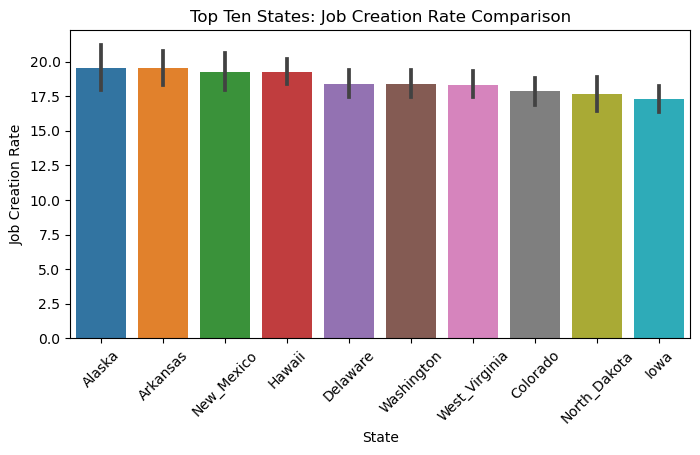

In [53]:
# Bar plot for comparing job creation rates across states
# Get the top ten states based on job creation rate
top_ten_states = df.groupby('State')['Job_Creation.Rate'].mean().nlargest(10).index

# Filter the DataFrame for the top ten states
top_ten_df = df[df['State'].isin(top_ten_states)]

# Bar plot for comparing job creation rates across top ten states
plt.figure(figsize=(8, 4))
sns.barplot(data=top_ten_df, x='State', y='Job_Creation.Rate', order=top_ten_states)
plt.title('Top Ten States: Job Creation Rate Comparison')
plt.xlabel('State')
plt.ylabel('Job Creation Rate')
plt.xticks(rotation=45)
plt.show()


##### Establishment Entry vs. Exit Trends:
##### It analyzes the trends of establishment entry and exit rates over different years to understand the dynamics of new businesses entering and existing ones leaving.

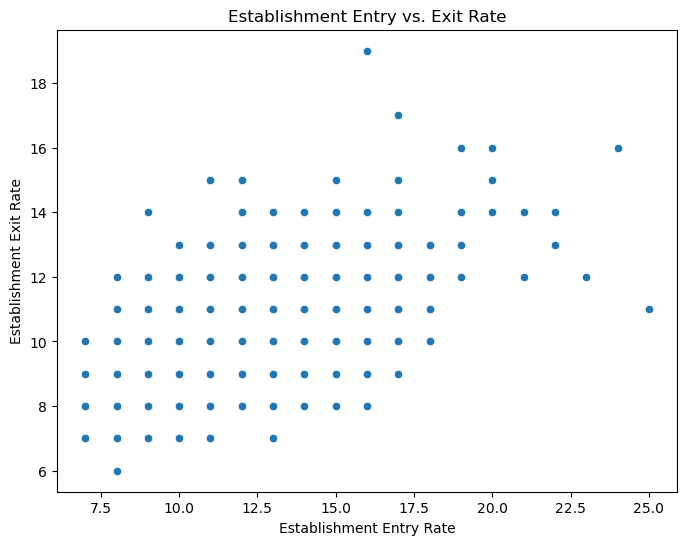

In [28]:
# Scatter plot for establishment entry vs. exit rate
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Establishments.Entered_Rate', y='Establishments.Exited_Rate')
plt.title('Establishment Entry vs. Exit Rate')
plt.xlabel('Establishment Entry Rate')
plt.ylabel('Establishment Exit Rate')
plt.show()

##### Impact of Firm Exits on Job Destruction:
##### This question investigates how firm exits affect job destruction, providing insights into the employment impact of businesses closing down.

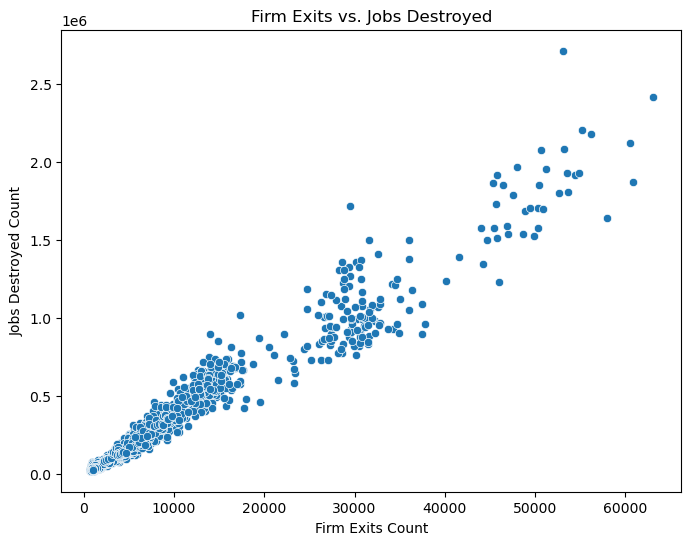

In [29]:
# Scatter plot for firm exits vs. jobs destroyed
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Firm_Exits.Count', y='Job_Destruction.Count')
plt.title('Firm Exits vs. Jobs Destroyed')
plt.xlabel('Firm Exits Count')
plt.ylabel('Jobs Destroyed Count')
plt.show()

##### State-wise Job Creation Rate Trends:
##### It examines the trend of job creation rates over time for a specific state, allowing for a deeper understanding of job growth patterns in that state.

C:\Users\ysagp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\ysagp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



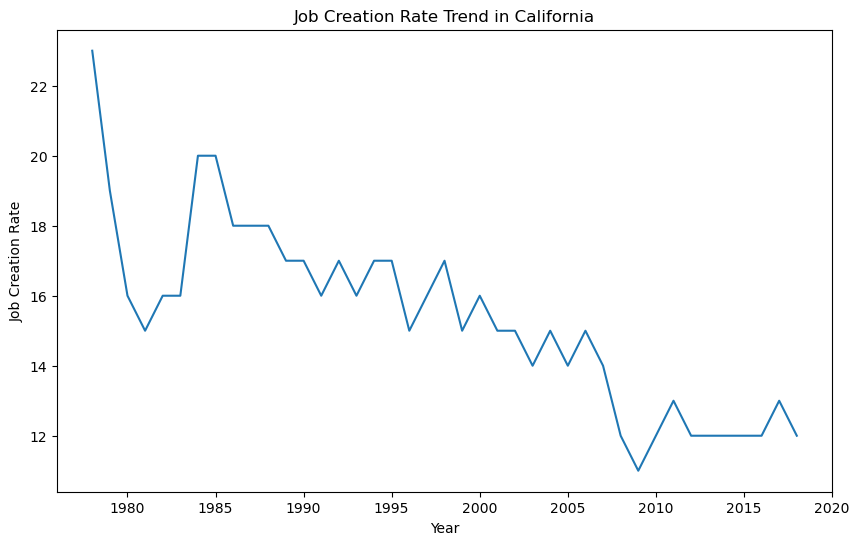

In [30]:
# Line plot for job creation rate trend for a specific state (e.g., 'California')
state_df = df[df['State'] == 'California']
plt.figure(figsize=(10, 6))
sns.lineplot(data=state_df, x='Year', y='Job_Creation.Rate')
plt.title('Job Creation Rate Trend in California')
plt.xlabel('Year')
plt.ylabel('Job Creation Rate')
plt.show()

##### Correlation between Physical Locations and Net Job Creation Rate:
##### This question explores whether there is a correlation between the number of physical locations a business has and its net job creation rate.

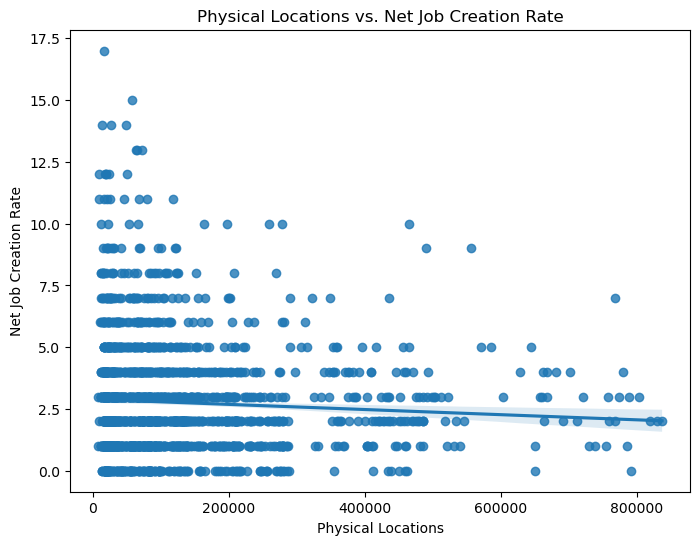

In [31]:
# Scatter plot with regression line for physical locations vs. net job creation rate
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='Establishments.Physical_Locations', y='Calculated.Net_Job_Creation_Rate')
plt.title('Physical Locations vs. Net Job Creation Rate')
plt.xlabel('Physical Locations')
plt.ylabel('Net Job Creation Rate')
plt.show()

##### Employment vs. Job Creation:
##### It looks at the relationship between employment levels and job creation, providing insights into how job creation varies with changes in overall employment.

C:\Users\ysagp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\ysagp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



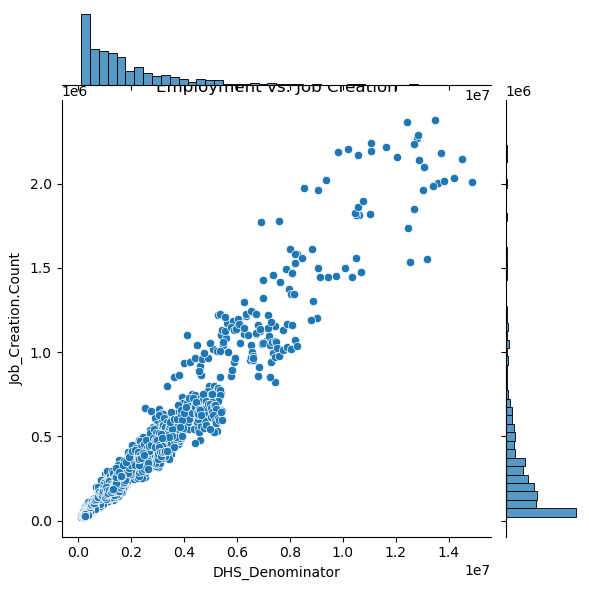

In [49]:
# Joint plot for employment vs. job creation
sns.jointplot(data=df, x='DHS_Denominator', y='Job_Creation.Count', kind='scatter')
plt.title('Employment vs. Job Creation')
plt.show()

##### State-wise Reallocation Rate Analysis:
##### This question compares reallocation rates across different states, helping to identify which states experience more significant shifts in job dynamics.

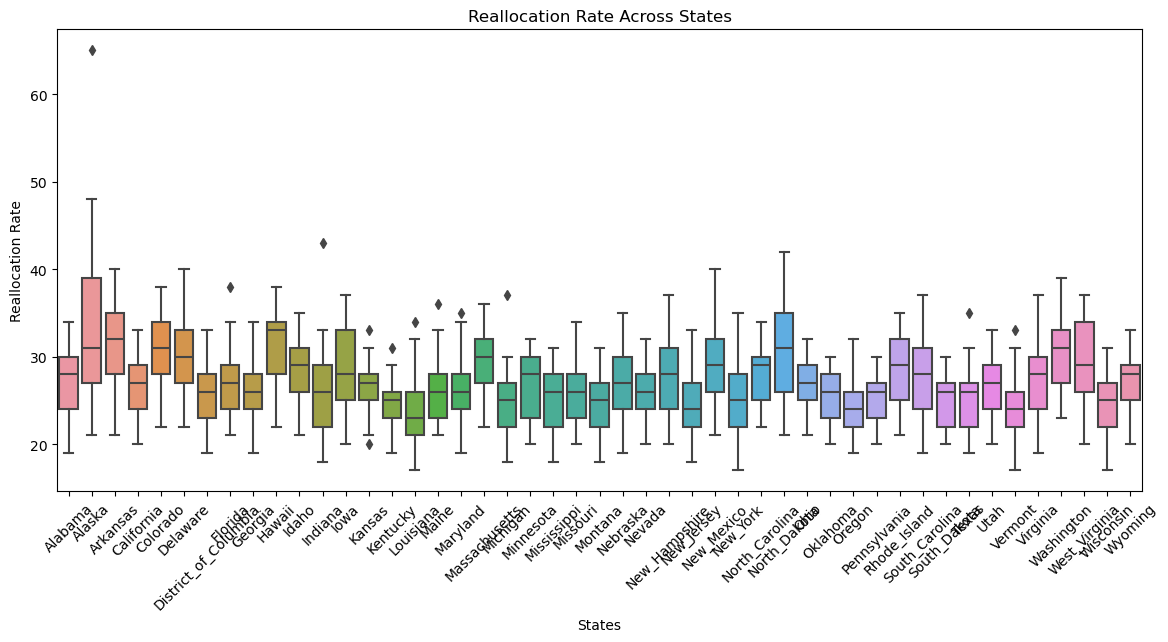

In [50]:
# Box plot for reallocation rate across industries
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='State', y='Calculated.Reallocation_Rate')
plt.title('Reallocation Rate Across States')
plt.xlabel('States')
plt.ylabel('Reallocation Rate')
plt.xticks(rotation=45)
plt.show()

##### Impact of Firm Age on Job Dynamics:
##### It analyzes how job creation and job destruction rates vary based on firm age, providing insights into how the age of a business influences its job dynamics.

C:\Users\ysagp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


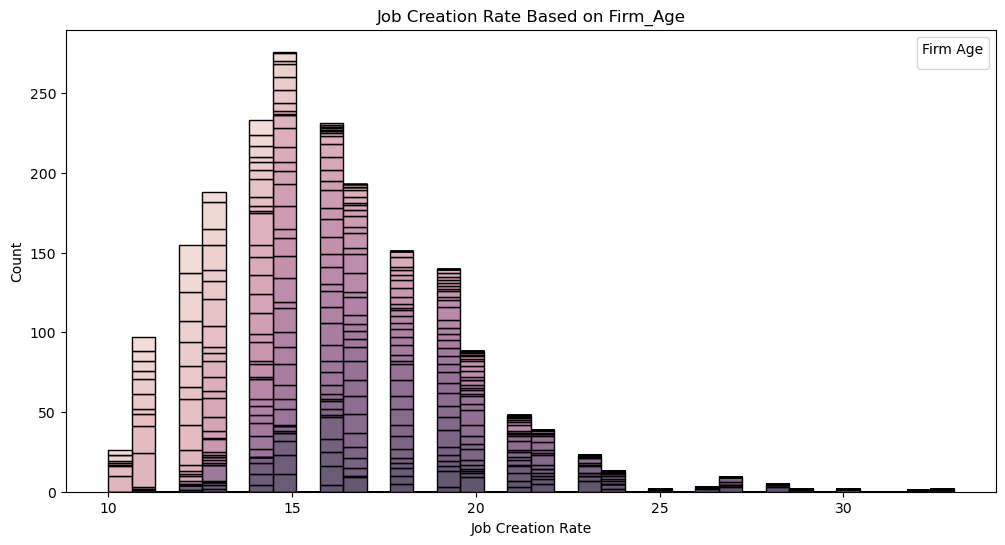

C:\Users\ysagp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


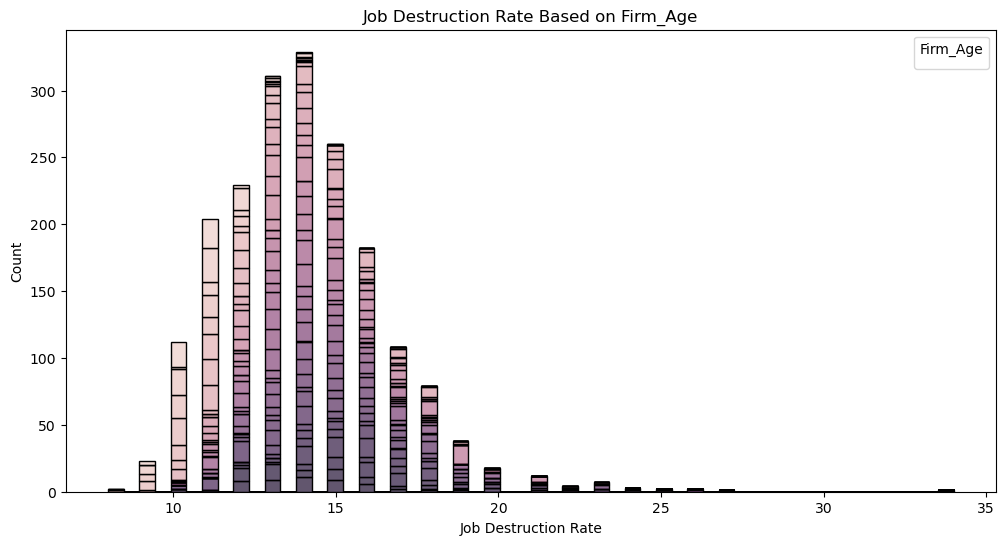

In [45]:
# Histograms for job creation and destruction rates based on firm age
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Job_Creation.Rate', hue='Firm_Age', multiple='stack')
plt.title('Job Creation Rate Based on Firm_Age')
plt.xlabel('Job Creation Rate')
plt.ylabel('Count')
plt.legend(title='Firm Age')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Job_Destruction.Rate', hue='Firm_Age', multiple='stack')
plt.title('Job Destruction Rate Based on Firm_Age')
plt.xlabel('Job Destruction Rate')
plt.ylabel('Count')
plt.legend(title='Firm_Age')
plt.show()